In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirpath, dirnames, filenames in os.walk('archive'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'archive'.
There are 0 directories and 9780 images in 'archive\crop_part1'.
There are 0 directories and 23708 images in 'archive\UTKFace'.
There are 2 directories and 0 images in 'archive\utkface_aligned_cropped'.
There are 0 directories and 9780 images in 'archive\utkface_aligned_cropped\crop_part1'.
There are 0 directories and 23708 images in 'archive\utkface_aligned_cropped\UTKFace'.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
import torch
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
image_folder = Path(".\\archive\\utkface_aligned_cropped\\UTKFace")
images = os.listdir(image_folder)
print(f"Total number of images: {len(images)}")
images[:2]

Total number of images: 23708


['100_0_0_20170112213500903.jpg.chip.jpg',
 '100_0_0_20170112215240346.jpg.chip.jpg']

(-0.5, 199.5, 199.5, -0.5)

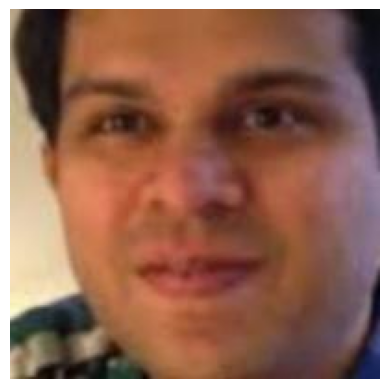

In [5]:
import random
import cv2

random_image = random.choice(images)
random_image_path = image_folder / random_image

random_image_path
random_img = cv2.imread(random_image_path)
random_img = cv2.cvtColor(random_img, cv2.COLOR_BGR2RGB)
plt.imshow(random_img)
plt.axis(False)

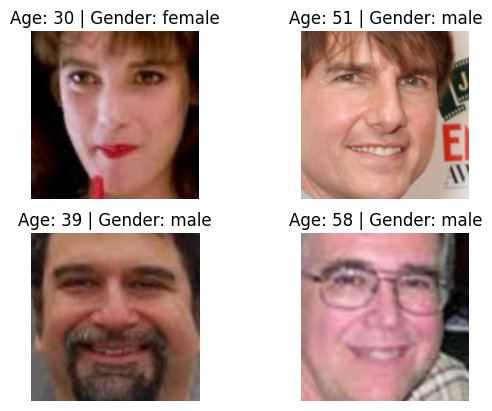

In [6]:
import random
import cv2

random_images = random.choices(images, k=4)

gender_map = {0: "male", 1: "female"}

fig, ax = plt.subplots(nrows = 2, ncols = 2)
ax = ax.ravel()
for idx, img in enumerate(random_images):
    image_path = image_folder / img
#     print(image_path)
    
    age, gender, _, _ = img.split("_")
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    ax[idx].set_title(f"Age: {age} | Gender: {gender_map[int(gender)]}")
    ax[idx].imshow(img)
    ax[idx].axis(False)
    

In [7]:
df = pd.DataFrame({"img_name" : images, "gender" : list(map(int, [img.split("_")[1] for img in images])), "age" : [img.split("_")[0] for img in images]})
df.head()

,img_name,gender,age
0,100_0_0_20170112213500903.jpg.chip.jpg,0,100
1,100_0_0_20170112215240346.jpg.chip.jpg,0,100
2,100_1_0_20170110183726390.jpg.chip.jpg,1,100
3,100_1_0_20170112213001988.jpg.chip.jpg,1,100
4,100_1_0_20170112213303693.jpg.chip.jpg,1,100


In [8]:
data_folder = Path("data")

train_folder = data_folder / "train"
test_folder = data_folder / "test"

train_folder.mkdir(parents=True, exist_ok=True)
test_folder.mkdir(parents=True, exist_ok=True)

In [2]:
import zipfile
from pathlib import Path

# Define the folder containing the images and the output zip file path
image_folder = Path("./archive/utkface_aligned_cropped/UTKFace")
zip_file_path = Path("face_data.zip")

# Create the parent directory if it doesn't exist
image_folder.parent.mkdir(parents=True, exist_ok=True)

# Create a zip file and add all images from the folder to it
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    for image_path in image_folder.glob('*.jpg'):
        zipf.write(image_path, arcname=image_path.name)

print(f"Created zip file at {zip_file_path}")

Created zip file at face_data.zip


In [4]:

images = list(image_folder.glob("*.jpg"))
split = int(len(images) * 0.8)
train_images = random.sample(images, k=split)
test_images = [img for img in images if img not in train_images]

len(train_images), len(test_images)

grnder = train_images[124].stem.split("_")[1]
grnder

'0'

In [10]:
train_images[0].stem + ".jpg"

'18_1_0_20170109214725387.jpg.chip.jpg'

In [15]:
from pathlib import Path
import shutil
import pandas as pd
import random

# Assuming df is already defined with the data
data_folder = Path("data")
image_folder = Path(".\\archive\\utkface_aligned_cropped\\UTKFace")  
gender_map = {0: "male", 1: "female"} 

train_folder = data_folder / "train"
test_folder = data_folder / "test"

# Create the train and test directories if they do not exist
train_folder.mkdir(parents=True, exist_ok=True)
test_folder.mkdir(parents=True, exist_ok=True)


# Function to copy images to their respective folders
def copy_images(data, folder):
    for img in data:
        gender = img.stem.split("_")[1]
        image_path = image_folder / str(img.stem + ".jpg")
        dest_dir = folder / gender_map[int(gender)]
        
        # print(f"{image_path}\n, {dest_dir}\n, {image_dir}\n")
        # break
        dest_dir.mkdir(parents=True, exist_ok=True)  # Create the directory if it doesn't exist
        # if not image_dir.is_dir():
        image_dest = dest_dir / img.name
        # print(image_path)
        # print(image_path.is_file(), image_dest.is_file())
        # break
        shutil.copy2(image_path, image_dest)  # Copy the image to the destination

# Copy train and test images
copy_images(train_images, train_folder)
copy_images(test_images, test_folder)

print("Images have been copied successfully.")


Images have been copied successfully.


In [13]:
from pathlib import Path
image_folder = Path(".\\archive\\utkface_aligned_cropped\\UTKFace")  
images = list(image_folder.glob("*.jpg"))

import random
split = int(len(images) * 0.8)
train_images = random.sample(images, k=split)
test_images = [img for img in images if img not in train_images]
len(train_images), len(test_images)

(18966, 4742)

In [10]:
import os

def walk_through_data(dir_path):
    for dirpath, dirname, filenames in os.walk(dir_path):
        print(f"there are {len(dirname)} directories ({dirname}) and {len(filenames)} images in {dirpath}.")


working_dir = "data"
walk_through_data(working_dir)

there are 2 directories (['test', 'train']) and 0 images in data.
there are 2 directories (['female', 'male']) and 0 images in data\test.
there are 0 directories ([]) and 1986 images in data\test\female.
there are 0 directories ([]) and 2756 images in data\test\male.
there are 2 directories (['female', 'male']) and 0 images in data\train.
there are 0 directories ([]) and 9331 images in data\train\female.
there are 0 directories ([]) and 9635 images in data\train\male.


In [11]:
data_folder

train_dir = data_folder / "train"
test_dir = data_folder / "test"

train_dir, test_dir

(WindowsPath('data/train'), WindowsPath('data/test'))

In [12]:
import numpy as np
import torch

print(np.__version__)
print(torch.__version__)
tensor = torch.randn(3, 3)
print(tensor)

1.26.4
2.3.1+cu121
tensor([[-0.2028, -0.5358,  1.1453],
        [ 0.4764,  1.4000, -1.2423],
        [ 0.1763,  0.7808, -0.9254]])


In [13]:
# import torch
# import torchvision
# from torchvision.models import resnet50, ResNet50_Weights

# weights = ResNet50_Weights.DEFAULT
# preprocess = weights.transforms()

# model = resnet50(weights=weights).to(device)

In [10]:
import torch
from torch import nn

class model_customV0(nn.Module):
    def __init__(self, input_shape: int, output_shape: int):
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.gender_fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=128*16*16, out_features=256),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(in_features=256, out_features=output_shape)
        )
        
        self.age_fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=128*16*16, out_features=256),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(in_features=256, out_features=output_shape)
        )
        
    def forward(self, x):
        # x = self.conv_block_1(x)
        # print(x.shape)
        # x = self.conv_block_2(x)
        # print(x.shape)
        # x = self.classifier(x)
        gender = torch.sigmoid(self.gender_fc(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))
        age = self.age_fc(self.conv_block_3(self.conv_block_2(self.conv_block_1(x))))
        return gender, age
    

modelV0 = model_customV0(input_shape=1, output_shape=1).to(device)

In [149]:
32768 / 128
16*16

256

In [11]:
from torchvision.transforms import  ToTensor, Normalize, Compose, Resize, Grayscale

custom_transform = Compose([
    Resize((128, 128)),
    Grayscale(),
    ToTensor(),
    # Normalize((0.5,), (0.5,))
])

Shape of image_trsnsformed:  torch.Size([1, 128, 128])
tensor([[[0.8078, 0.7961, 0.7412,  ..., 0.3765, 0.3686, 0.3765],
         [0.7922, 0.7843, 0.7569,  ..., 0.3804, 0.3725, 0.3843],
         [0.7647, 0.7569, 0.7529,  ..., 0.3843, 0.3765, 0.3882],
         ...,
         [0.9255, 0.9294, 0.9294,  ..., 0.3725, 0.3725, 0.3765],
         [0.9294, 0.9255, 0.9216,  ..., 0.3725, 0.3725, 0.3765],
         [0.9216, 0.9137, 0.9059,  ..., 0.3725, 0.3725, 0.3765]]])
Output of the model:  (tensor([[0.5050]], device='cuda:0', grad_fn=<SigmoidBackward0>), tensor([[0.0647]], device='cuda:0', grad_fn=<AddmmBackward0>))


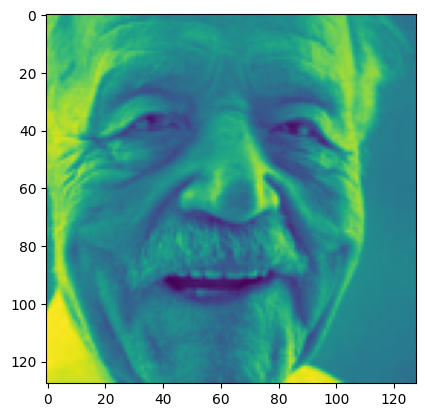

In [151]:
from PIL import Image


image = Image.open(image_folder / df['img_name'][0])

image_trsnsformed = custom_transform(image)
print("Shape of image_trsnsformed: ",image_trsnsformed.shape)
print(image_trsnsformed)

gender, age = modelV0(image_trsnsformed.unsqueeze(0).to(device))
print("Output of the model: ", (gender, age))

plt.imshow(image_trsnsformed.permute(1, 2, 0))

In [152]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                 transform = custom_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                transform = custom_transform,
                                 target_transform=None)

In [185]:
lis = list(Path("data/train").glob("*/*.jpg"))
lis[0].stem

'100_1_0_20170110183726390.jpg.chip'

In [12]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image

class create_dataset(Dataset):
    def __init__(self, root: str, transform):
        self.data = list(Path(root).glob("*/*.jpg"))
        self.gender = [img.stem.split("_")[1] for img in self.data]
        self.age = [img.stem.split("_")[0] for img in self.data]
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        image_path = self.data[index]
        image = Image.open(image_path)
        image = self.transform(image)
        gender = torch.tensor(int(self.gender[index]))
        age = torch.tensor(int(self.age[index]))
        return image, (gender, age)
    
    def gender_to_idx(self):
        return {"male": 0, "female": 1}
    
train_dir = "data/train"
test_dir = "data/test"

train_data = create_dataset(train_dir, custom_transform)
test_data = create_dataset(test_dir, custom_transform)

len(train_data), len(test_data)

(18966, 4742)

In [13]:
train_data.gender_to_idx()

{'male': 0, 'female': 1}

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

len(train_dataloader), len(test_dataloader)

(297, 75)

In [15]:
img, (gender, age) = next(iter(train_dataloader))

print(f"Image shape {img.shape}")
print(f"Gender shape {gender.shape} | Age shape {age.shape}")

Image shape torch.Size([64, 1, 128, 128])
Gender shape torch.Size([64]) | Age shape torch.Size([64])


In [16]:
gen_loss_fn = torch.nn.BCELoss()
age_loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.SGD(params = modelV0.parameters(),
                           lr = 0.01)


def lr_lambda(epoch):
    base_lr = 0.001
    factor = 0.9
    return base_lr/(1+factor*epoch)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

In [21]:
# device = torch.device('cpu')

def check_for_invalid_values(tensor, name):
    if torch.isnan(tensor).any() or torch.isinf(tensor).any():
        raise ValueError(f"Tensor {name} contains NaN or Inf values.")

with torch.inference_mode():
    for batch, (X, (gen, age)) in enumerate(test_dataloader):
        print(f"Shapes before moving to device: X={X.shape}, gen={gen.shape}, age={age.shape}")
        
        # Check for invalid values
        check_for_invalid_values(X, 'X')
        check_for_invalid_values(gen, 'gen')
        check_for_invalid_values(age, 'age')
        
        # Move tensors to device and ensure correct dimensions
        X = X.to(device)
        gen = gen.unsqueeze(1).to(device)  # gen is (batch,) and needs to be (batch, 1)
        age = age.unsqueeze(1).to(device)  # age is (batch,) and needs to be (batch, 1)
        
        print(f"Shapes after moving to device: X={X.shape}, gen={gen.shape}, age={age.shape}")
        
        # Forward pass
        modelV0 = modelV0.to(device)
        gender_pred, age_pred = modelV0(X)
        
        # Print prediction shapes for debugging
        print(f"Predictions: gender_pred={gender_pred.shape}, gen={gen.shape}, age_pred={age_pred.shape}")
        
        break


Shapes before moving to device: X=torch.Size([64, 1, 128, 128]), gen=torch.Size([64]), age=torch.Size([64])


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [22]:
NUM_EPOCHS = 40

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

t_acc = []

for epoch in range(NUM_EPOCHS):
    print(f"Epoch {epoch + 1}/{NUM_EPOCHS}")
    print("-" * 10)

    train_loss_gender, train_loss_age = 0.0, 0.0
    train_acc_gender, train_acc_age = 0.0, 0.0
    
    for batch, (X, (gen, age)) in enumerate(train_dataloader):
        X, gen, age = X.to(device), gen.unsqueeze(1).to(device), age.unsqueeze(1).to(device)
        y_pred_gender, y_pred_age = modelV0(X)
        
        # loss & acc for gender
        gen_loss = gen_loss_fn(y_pred_gender, gen.type(torch.float)) # calculate the loss for gender
        train_loss_gender += gen_loss
        train_acc_gender += ((y_pred_gender.round() == gen).sum().item() / len(gen))
        
        # loss and acc for age
        age_loss = age_loss_fn(y_pred_age, age.type(torch.float)) # calculate the loss for age
        train_loss_age += age_loss
        train_acc_age += ((y_pred_age.round() == age).sum().item() / len(age))
        
        loss = gen_loss + age_loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # schedular.step()
    train_loss_gender /= len(train_dataloader)
    train_acc_gender /= len(train_dataloader)
    
    train_loss_age /= len(train_dataloader)
    train_acc_age /= len(train_dataloader)
    
    # print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}")

    # print("-" * 10)

    test_loss_gender, test_loss_age = 0.0, 0.0
    test_acc_gender, test_acc_age = 0.0, 0.0
    
    modelV0.eval()
    with torch.inference_mode():
        for batch, (X, (gen, age)) in enumerate(test_dataloader):
            X, gen, age = X.to(device), gen.unsqueeze(1).to(device), age.unsqueeze(1).to(device)
            test_pred_gender, test_pred_age = modelV0(X)
            
            # loss & acc for gender
            loss = gen_loss_fn(test_pred_gender, gen.type(torch.float))
            test_loss_gender += loss
            test_acc_gender += ((test_pred_gender.round() == gen).sum().item() / len(gen))
            
            # loss and acc for age
            loss = age_loss_fn(test_pred_age, age.type(torch.float))
            test_loss_age += loss
            test_acc_age += ((test_pred_age.round() == age).sum().item() / len(age))

        test_loss_gender /= len(test_dataloader)
        test_acc_gender /= len(test_dataloader)
        
        test_loss_age /= len(test_dataloader)
        test_acc_age /= len(test_dataloader)
        

    t_acc.append([test_acc_gender, test_acc_age])
    
    # if test_acc_gender > max(t_acc, key=lambda x: x[0]) and test_acc_age > max(t_acc, key=lambda x: x[1]):
    #     torch.save(modelV0.state_dict(), model_path / "modelV0.pt")
    
    print(f"""Gender:: Train loss: {train_loss_gender:.5f} | Train acc: {train_acc_gender:.5f} | Test loss: {test_loss_gender:.5f} | Test acc: {test_acc_gender:.5f}
            Age::    Train loss: {train_loss_age:.5f}    | Train acc: {train_acc_age:.5f}    | Test loss: {test_loss_age:.5f}    | Test acc: {test_acc_age:.5f}""")

Epoch 1/40
----------


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device= device):
    model.train()

    train_loss, train_acc = 0.0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.unsqueeze(1).to(device)
        
        y_pred_logits = model(X)
        y_preds = torch.round(torch.sigmoid(y_pred_logits))
#         print(y.dtype, y_preds.dtype, y_pred_logits.dtype)
#         print(y_pred_logits)
#         print(y.shape, y_preds.shape, y_pred_logits.shape)

        loss = loss_fn(y_pred_logits, y.type(torch.float))
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(y_preds, dim=1)
        # print(y_pred_class.shape, y.shape)
        train_acc += ((y_preds == y).sum().item() / len(y))

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss.detach().cpu().numpy(), train_acc # tensor.detach() to remove the grad associated

In [ ]:
# train_step(model, train_dataloader, loss_fn, optimizer, device)

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):
    model.eval()

    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.unsqueeze(1).to(device)

            test_preds_logits = model(X)
            test_preds = torch.round(torch.sigmoid(test_preds_logits))
            
            loss = loss_fn(test_preds_logits, y.type(torch.float))
            test_loss += loss

            # calculate the accuracy
            test_pred_labels = test_preds.argmax(dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(y)

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)

    return test_loss.cpu().numpy(), test_acc

In [58]:
# test_step(model, train_dataloader, loss_fn, device)

In [59]:
from tqdm.auto import tqdm

def train(model:torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = torch.nn.CrossEntropyLoss(),
          epochs = 5,
          device = device):

    results = {"train loss": [],
               "train acc": [],
               "test loss": [],
               "test acc": []}


    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                        dataloader=train_dataloader,
                                        loss_fn=loss_fn,
                                        optimizer=optimizer,
                                        device=device)

        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        print(f"train loss {train_loss:.4f} | train acc {train_acc:.4f} | test loss {test_loss:.4f} | test acc {test_acc:.4f}")
        print("*"*14)

        # train_losses =

        results['train loss'].append(train_loss)
        results['train acc'].append(train_acc)
        results['test loss'].append(test_loss)
        results['test acc'].append(test_acc)

    return results

In [60]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 10

from timeit import default_timer as timer

start_time = timer()

model_results = train(model=modelV0.to(device),
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_time = timer()
print(f"Total training time: {end_time - start_time}")

  0%|          | 0/10 [00:00<?, ?it/s]

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn